In [1]:
from sklearn.datasets import load_digits
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox
%matplotlib inline

# Análisis de componentes principales

En muchas aplicaciones, la dimensionalidad de los datos puede ser  muy alta, dificultando la aplicación de cualquier método de aprendizaje. El procesamiento de señales [audio, imágenes o vídeo] es un área en la que este problema es frecuente. 

El **análisis de componentes principales** es una metodología que permite reducir la dimensionalidad de las observaciones preservando la mayor cantidad de información. 

Considera los siguientes datos:

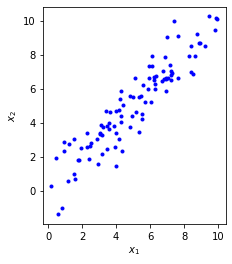

In [2]:
n = 100

np.random.seed(123)
x = 5+5*(2*np.random.uniform(size=n)-1)
y = x+np.random.normal(size=n)

X = np.column_stack((x,y))
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y,'b.')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
ax.set_aspect('equal')
plt.show()

Cada observación tiene una dimensionalidad de **dos**, sin embargo, es posible observar que las observaciones pueden proyectarse sobre una línea recta sin **perder mucha información**. Al proyectar los datos sobre la recta, reducimos la dimensionalidad a uno.  

Por simplicidad, para realizar la proyección centramos las observaciones en el origen, restando la media de cada componente:

In [3]:
#media por columnas
mx = np.mean(X, axis=0)
mx

array([5.0142888 , 5.04932857])

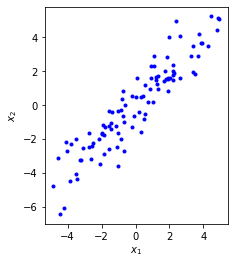

In [4]:
#centramos los datos en el origen
Xc = X-mx

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Xc[:,0],Xc[:,1],'b.')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
ax.set_aspect('equal')
plt.show()

## Transformación de variables

La idea del **análisis de componentes principales** es la de construir nuevas variables a partir de una transformación lineal de las originales. 

Las nuevas variables definen un nuevo sistema de ejes coordenados.

Observa en la siguiente celda algunas transformaciones lineales y su interpretación geométrica.


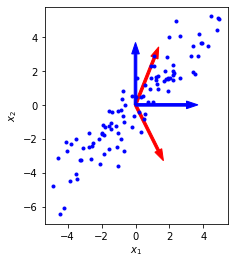

In [5]:
#variables originales
x1 = np.array([1,0])
x2 = np.array([0,1])

#variables transformadas (ejemplos arbitrarios)
x1t = x1-2*x2
x1t = x1t/np.linalg.norm(x1t)

x2t = 2*x1+5*x2
x2t = x2t/np.linalg.norm(x2t)

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(Xc[:,0],Xc[:,1],'b.')
plt.arrow(0,0,3*x1t[0],3*x1t[1], width=0.15, color="r")
plt.arrow(0,0,3*x2t[0],3*x2t[1], width=0.15, color="r")

plt.arrow(0,0,3*x1[0],3*x1[1], width=0.15, color="b")
plt.arrow(0,0,3*x2[0],3*x2[1], width=0.15, color="b")

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

ax.set_aspect('equal')

plt.show()

### Ortogonalidad

Las nuevas variables deben ser ortogonales entre sí (para formar nuevos ejes de coordenadas):

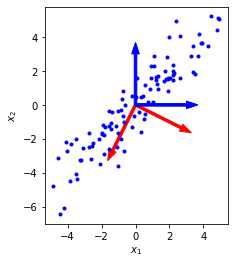

In [6]:
#variables originales
x1 = np.array([1,0])
x2 = np.array([0,1])

#variables transformadas (ejemplos arbitrarios)
x1t = np.array([2,-1])
x1t = x1t/np.linalg.norm(x1t)

x2t = np.array([x1t[1],-x1t[0]])
x2t = x2t/np.linalg.norm(x2t)

fig = plt.figure()
ax = fig.add_subplot(111)


plt.plot(Xc[:,0],Xc[:,1],'b.')
plt.arrow(0,0,3*x1t[0],3*x1t[1], width=0.15, color="r")
plt.arrow(0,0,3*x2t[0],3*x2t[1], width=0.15, color="r")
plt.arrow(0,0,3*x1[0],3*x1[1], width=0.15, color="b")
plt.arrow(0,0,3*x2[0],3*x2[1], width=0.15, color="b")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

ax.set_aspect('equal')

plt.show()

### Maximización de la varianza

Además, vamos a elegir las direcciones de los nuevos ejes de manera que la varianza proyectada sobre ellos se maximice:

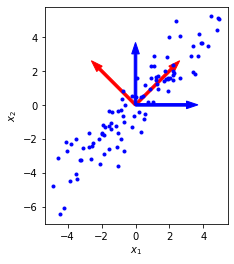

In [7]:
#variables originales
x1 = np.array([1,0])
x2 = np.array([0,1])

#variables transformadas (ejemplos arbitrarios)
x1t = np.array([1,1])
x1t = x1t/np.linalg.norm(x1t)

x2t = np.array([-x1t[1],x1t[0]])
x2t = x2t/np.linalg.norm(x2t)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Xc[:,0],Xc[:,1],'b.')
plt.arrow(0,0,3*x1t[0],3*x1t[1], width=0.15, color="r")
plt.arrow(0,0,3*x2t[0],3*x2t[1], width=0.15, color="r")
plt.arrow(0,0,3*x1[0],3*x1[1], width=0.15, color="b")
plt.arrow(0,0,3*x2[0],3*x2[1], width=0.15, color="b")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
ax.set_aspect('equal')
plt.show()

A los nuevos ejes coordenados se les llama **componentes principales**.

## Matriz de covarianza

El proceso para obtener las componentes principales se basa en la evaluación de la la matriz de covarianza de los datos centrados, la cual contiene **toda** la información de los datos originales:

$$C = (X-\mu_X)^{T}(X-\mu_X)/(N-1)$$

En la siguiente celda mostramos cómo evaluarla para los datos del ejemplo.

In [8]:
C = np.dot(np.transpose(X-mx), X-mx)/99
C

array([[6.08199754, 5.91836354],
       [5.91836354, 6.72596256]])

## Vectores y valores propios

La obtención de las componentes principales se basa en los valores y vectores propios de la matriz de covarianza:

In [9]:
l, v = np.linalg.eig(C)
print(l)
print(v)

[ 0.47686442 12.33109568]
[[-0.7260591 -0.6876323]
 [ 0.6876323 -0.7260591]]


Con la descomposición hemos obtenido un vector de **valores propios**, $$\lambda = [\lambda_1, \lambda_2]$$ 

Observa que $\lambda_1 = 0.477$ y $\lambda_2 = 12.33 $

y una matriz cuyas columnas son los **vectores propios** de la matriz de covarianza:

$$V = [\vec{v_1} \;\;\; \vec{v_2}]$$

Observa que $$\vec{v_1} = [-0.726, \; 0.688]$$ y que $$\vec{v_2} = [-0.688, \; -0.726]$$

Recuerda que los valores y vectores propios de la matriz de covarianza tienen la siguiente propiedad:

\begin{align}
    Cv_1 &= \lambda_1v_1\\
    Cv_2 &= \lambda_2v_2
\end{align}

como puedes verificarlo en la siguiente celda

In [10]:
l1 = l[0]
l2 = l[1]
v1 = np.asmatrix(v[:,0])
v2 = np.asmatrix(v[:,1])


print(np.dot(C,np.transpose(v1)))
print(np.transpose(l1*v1))

print("##################")
print(np.dot(C,np.transpose(v2)))
print(np.transpose(l2*v2))


[[-0.34623175]
 [ 0.32790738]]
[[-0.34623175]
 [ 0.32790738]]
##################
[[-8.47925968]
 [-8.95310427]]
[[-8.47925968]
 [-8.95310427]]


Más aún, podemos verificar en la siguiente celda que la matriz de covarianza se puede reconstruir como 

$$C = \lambda_1 v_1^{T}v_1+\lambda_2v_2^{T}v_2$$

In [11]:
print(l[0]*np.dot(np.transpose(v1),v1)+l[1]*np.dot(np.transpose(v2),v2))
print("###############")
print(C)

[[6.08199754 5.91836354]
 [5.91836354 6.72596256]]
###############
[[6.08199754 5.91836354]
 [5.91836354 6.72596256]]


Observa que $\lambda_2$ es mucho mayor que $\lambda_1$:

In [12]:
l[1]/l[0]

25.858703491749086

Esto significa que podemos aproximar la matriz original solamente con el segundo vector y valor propio:

\begin{align}
    C &= \lambda_1 v_1^{T}v_1+\lambda_2v_2^{T}v_2\\
    \color{red}{C }&\color{red}{\approx \lambda_2v_2^{T}v_2}\\
\end{align}

In [13]:
print(l[1]*np.dot(np.transpose(v2),v2))
print("###############")
print(C)

[[5.83061283 6.15644367]
 [6.15644367 6.50048285]]
###############
[[6.08199754 5.91836354]
 [5.91836354 6.72596256]]


<font color="red">Los valores propios son proporcionales a la información que proyecta la matriz de covarianza en la dirección del vector propio correspondiente</font>

## Gráfica de los vectores propios
Podemos graficar un par de segmentos de recta con la dirección de los vectores propios de la matriz, escalados por su respectivo valor propio.

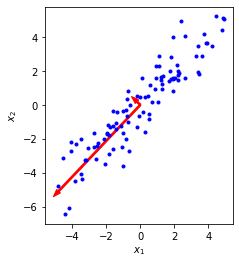

In [14]:
#variables originales
x1 = np.array([1,0])
x2 = np.array([0,1])

#variables transformadas (componentes principales)
x1t = np.array([v1[0,0],v1[0,1]])
x2t = np.array([v2[0,0],v2[0,1]])

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Xc[:,0],Xc[:,1],'b.')
plt.arrow(0,0,7*x1t[0]*l[0]/l[1],7*x1t[1]*l[0]/l[1], width=0.1, color="r")
plt.arrow(0,0,7*x2t[0],7*x2t[1], width=0.1, color="r")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
ax.set_aspect('equal')
plt.show()

La primera componente principal recibe solamente el $3.7\%$ de la información del conjunto original, mientras que la segunda el $96.3\%$.

In [15]:
l[1]/(l[0]+l[1])

0.9627681209442147

Dado que la mayor cantidad de información se proyecta en la segunda componente principal, podemos olvidarnos de la primera.

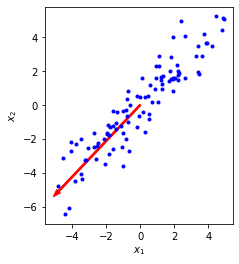

In [16]:
#variables originales
x1 = np.array([1,0])
x2 = np.array([0,1])

#variables transformadas (componentes principales)
x2t = np.array([v2[0,0],v2[0,1]])

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Xc[:,0],Xc[:,1],'b.')
plt.arrow(0,0,7*x2t[0],7*x2t[1], width=0.1, color="r")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
ax.set_aspect('equal')
plt.show()

Debemos proyectar los datos sobre esta componente para que se representen con una sola dimensión. Eso lo logramos multiplicando:

$$X' = Xv_2^T$$

Observa que los puntos transformados tienen una dimensión de 1 (se encuentran sobre una recta)

In [17]:
Xp = np.dot(Xc, np.transpose(v2))
Xp.shape

(100, 1)

Visualizamos las proyecciones

In [18]:
Xt = np.dot(Xp, v2)

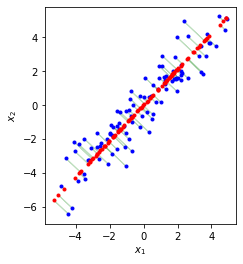

In [19]:
#variables originales
x1 = np.array([1,0])
x2 = np.array([0,1])

#variables transformadas (componentes principales)
x2t = np.array([v2[0,0],v2[0,1]])

fig = plt.figure()
ax = fig.add_subplot(111)
l = 100
plt.plot(Xc[:l,0],Xc[:l,1],'b.')
plt.plot(Xt[:l,0],Xt[:l,1],'r.')

for i in range(l):
    plt.arrow(Xc[i,0],Xc[i,1],Xt[i,0]-Xc[i,0],Xt[i,1]-Xc[i,1], color="g", alpha=0.25)    

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
ax.set_aspect('equal')
plt.show()

# Conjunto de dígitos manuscritos

In [20]:
[digits,labs] = load_digits(return_X_y=True)
[N,d] = digits.shape # número de datos y dimensionalidad
print(N) #número de datos
print(d) #dimensionalidad

1797
64


## Visualización de algunos datos

[[ 0.  0.  1. 14.  2.  0.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  0. 14. 10.  0.  0.  0.]
 [ 0.  0.  0. 11. 16.  1.  0.  0.]
 [ 0.  0.  0.  3. 14.  6.  0.  0.]
 [ 0.  0.  0.  0.  8. 12.  0.  0.]
 [ 0.  0. 10. 14. 13. 16.  8.  3.]
 [ 0.  0.  2. 11. 12. 15. 16. 15.]]
1


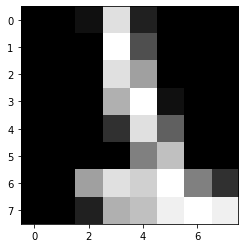

In [21]:
#elige aleatoriamente algún dato y lo visualiza
n = randint(0,N)

plt.imshow(np.reshape(digits[n],(8,8)), cmap='gray')

print(np.reshape(digits[n],(8,8)))
print(labs[n])
plt.show()

## Descomposición en componentes principales

* El objetivo de este método es describir la variación en un conjunto de variables correlacionadas:
$x_1, x_2, x_3, \cdots , x_d$ en términos de nuevas variables independientes $s_1, s_2, s_3, \cdots , s_d$

* Las nuevas variables están ordenadas decrecientemente de acuerdo a la importancia de cada una de ellas 
* La primera variable, $s_1$, busca explicar la mayor cantidad de variación en los datos originales considerando todas las posibles combinaciones lineales de las variables originales. 
* La variable $s_2$, se determina buscando explicar el mayor porcentaje de la variación aún no explicada por $s_1$ condicionada a ser independiente de $s_1$   
* El proceso continúa para determinar $s_3, s_4, \cdots, s_d$

In [22]:
from sklearn.decomposition import PCA

### Selecciona solamente a los datos correspondientes al 1 y al 9

In [23]:
d1 = 1
d2 = 9
ind_d1 = labs == d1
ind_d2 = labs == d2
dig1 = digits[ind_d1]
dig2 = digits[ind_d2]
dat = np.vstack((dig1,dig2))
lab1 = labs[ind_d1]
lab2 = labs[ind_d2]
nlabs = np.concatenate((lab1,lab2))

In [24]:
pca = PCA(n_components=2) #proyecta a un espacio de dos componentes solamente para visualizar
pca.fit(dat)

PCA(n_components=2)

### Proyecta los datos

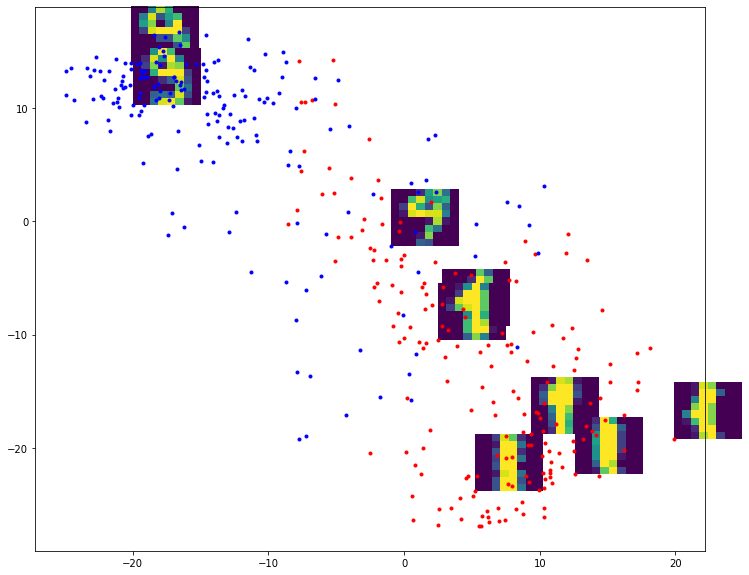

In [33]:
dat_proy = pca.transform(dat)

ind1 = nlabs == d1
ind2 = nlabs == d2

dig1_proy = dat_proy[ind1]
dig2_proy = dat_proy[ind2]

#grafica las proyecciones de cada dato
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

plt.plot(dig1_proy[:,0],dig1_proy[:,1],'r.')
plt.plot(dig2_proy[:,0],dig2_proy[:,1],'b.')

#selecciona aleatoriamente algunos datos y despliega sus imágenes

[N,d] = dat_proy.shape
for i in range(10):
    n = randint(0,N-1)
    x = dat_proy[n,0]
    y = dat_proy[n,1]
    bb = Bbox.from_bounds(x,y,5,5)  
    bb2 = TransformedBbox(bb,ax.transData)
    bbox_image = BboxImage(bb2, norm = None, origin=None, clip_on=False)
    im = np.reshape(dat[n],(8,8))
    bbox_image.set_data(im)
    ax.add_artist(bbox_image)
    
plt.show()

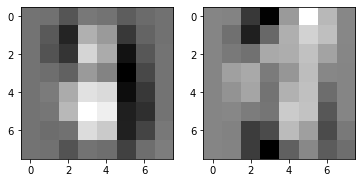

In [26]:
#visualizamos las dos componentes principales
c = pca.components_

plt.subplot(121)
plt.imshow(np.reshape(c[0],(8,8)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(c[1],(8,8)), cmap='gray')
plt.show()

## Elección del número de componentes

In [27]:
pca = PCA(n_components=64) #proyecta a un espacio de 64 componentes
pca.fit(digits) #tiene a todos los digitos

PCA(n_components=64)

### Varianza explicada por cada componente

In [28]:
ev = pca.explained_variance_
ev = 100*ev/np.sum(ev)
print(ev)

[1.48905936e+01 1.36187712e+01 1.17945938e+01 8.40997942e+00
 5.78241466e+00 4.91691032e+00 4.31598701e+00 3.66137258e+00
 3.35324810e+00 3.07880621e+00 2.37234084e+00 2.27269657e+00
 1.82186331e+00 1.77385494e+00 1.46710109e+00 1.40971560e+00
 1.31858920e+00 1.24813782e+00 1.01771796e+00 9.05617439e-01
 8.89538461e-01 7.97123157e-01 7.67493255e-01 7.22903569e-01
 6.95888851e-01 5.96081458e-01 5.75614688e-01 5.15157582e-01
 4.89539777e-01 4.28887968e-01 3.73606048e-01 3.53274223e-01
 3.36683986e-01 3.28029851e-01 3.08320884e-01 2.93778629e-01
 2.56588609e-01 2.27742397e-01 2.22277922e-01 2.11430393e-01
 1.89909062e-01 1.58652907e-01 1.51159934e-01 1.40578764e-01
 1.16622290e-01 1.07492521e-01 9.64053065e-02 7.74630271e-02
 5.57211553e-02 4.04330693e-02 2.09916327e-02 8.24797098e-03
 5.25149980e-03 5.05243719e-03 3.29961363e-03 1.24365445e-03
 7.04827911e-04 3.01432139e-04 1.06230800e-04 5.50074587e-05
 3.42905702e-05 9.50687638e-32 9.50687638e-32 9.36179501e-32]


[14.890593584063849, 28.509364823699322, 40.303958587675126, 48.713938008684316, 54.49635267268983, 59.41326298981382, 63.72925000063961, 67.39062257772366, 70.74387067569079, 73.82267688459534, 76.19501772859844, 78.46771429740801, 80.2895776104032, 82.06343254758511, 83.53053364037441, 84.94024924198311, 86.25883844271054, 87.50697626053609, 88.52469422085765, 89.43031165985265, 90.31985012037214, 91.11697327690571, 91.88446653146943, 92.60737010079615, 93.30325895169713, 93.89934040973574, 94.4749550980758, 94.99011267982517, 95.47965245651599, 95.90854042457175, 96.28214647289738, 96.63542069634704, 96.97210468188611, 97.30013453241378, 97.60845541651597, 97.90223404507296, 98.15882265392924, 98.3865650513623, 98.60884297347573, 98.82027336611436, 99.01018242795547, 99.16883533457255, 99.31999526903918, 99.46057403272029, 99.57719632305026, 99.68468884415466, 99.78109415065086, 99.85855717776015, 99.91427833305843, 99.95471140234797, 99.97570303506734, 99.98395100604513, 99.9892025

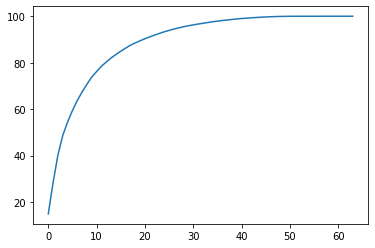

In [29]:
### Varianza acumulada
ac_va = []
for i in range(len(ev)):
    ac = np.sum(ev[:i+1])
    ac_va.append(ac)
print(ac_va)
plt.plot(range(len(ev)),ac_va)